# Mask-Dino Demo Tutorials

### Import Library

In [1]:
import argparse
import glob
import multiprocessing as mp
import os

# fmt: off
import sys
home_dir = os.path.abspath(os.getcwd()+"/../")
sys.path.insert(1, home_dir)
print(home_dir)

# fmt: on
import tempfile
import time
import warnings

import cv2
import numpy as np
import tqdm

from matplotlib import pyplot as plt

from detectron2.config import get_cfg
from detectron2.data.detection_utils import read_image
from detectron2.projects.deeplab import add_deeplab_config
# from detectron2.utils.logger import setup_logger

from maskdino import add_maskdino_config
from predictor import VisualizationDemo

/home/djjin/Mygit/MaskDINO


/home/djjin/anaconda3/envs/conda_MaskDino/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
WINDOW_NAME = "mask2former demo"

def setup_cfg(args):
    # load config from file and command-line arguments
    cfg = get_cfg()
    add_deeplab_config(cfg)
    add_maskdino_config(cfg)
    cfg.merge_from_file(args.config_file)
    cfg.merge_from_list(args.opts)
    cfg.freeze()
    return cfg

def get_parser():
    parser = argparse.ArgumentParser(description="maskdino demo for builtin configs")
    parser.add_argument(
        "--config-file",
        default="../configs/coco/instance-segmentation/maskdino_R50_bs16_50ep_3s.yaml",
        metavar="FILE",
        help="path to config file",
    )
    parser.add_argument("--webcam", action="store_true", help="Take inputs from webcam.")
    parser.add_argument("--video-input", help="Path to video file.")
    parser.add_argument(
        "--input",
        nargs="+",
        help="A list of space separated input images; "
        "or a single glob pattern such as 'directory/*.jpg'",
    )
    parser.add_argument(
        "--output",
        help="A file or directory to save output visualizations. "
        "If not given, will show output in an OpenCV window.",
    )

    parser.add_argument(
        "--confidence-threshold",
        type=float,
        default=0.5,
        help="Minimum score for instance predictions to be shown",
    )
    parser.add_argument(
        "--opts",
        help="Modify config options using the command-line 'KEY VALUE' pairs",
        default=[],
        nargs=argparse.REMAINDER,
    )
    return parser

In [3]:
mp.set_start_method("spawn", force=True)
args = get_parser().parse_args('')

# setup_logger(name="fvcore")
# logger = setup_logger()
# logger.info("Arguments: " + str(args))

args.input = ["../images/london.jpg"]
args.opts = ['MODEL.WEIGHTS', '../ckpts/maskdino_r50_50ep_300q_hid1024_3sd1_instance_maskenhanced_mask46.1ap_box51.5ap.pth']
args.output = home_dir + "/outputs"

In [4]:
cfg = setup_cfg(args)
demo = VisualizationDemo(cfg)

criterion.weight_dict  {'loss_ce': 4.0, 'loss_mask': 5.0, 'loss_dice': 5.0, 'loss_bbox': 5.0, 'loss_giou': 2.0, 'loss_ce_interm': 4.0, 'loss_mask_interm': 5.0, 'loss_dice_interm': 5.0, 'loss_bbox_interm': 5.0, 'loss_giou_interm': 2.0, 'loss_ce_dn': 4.0, 'loss_mask_dn': 5.0, 'loss_dice_dn': 5.0, 'loss_bbox_dn': 5.0, 'loss_giou_dn': 2.0, 'loss_ce_interm_dn': 4.0, 'loss_mask_interm_dn': 5.0, 'loss_dice_interm_dn': 5.0, 'loss_bbox_interm_dn': 5.0, 'loss_giou_interm_dn': 2.0, 'loss_ce_0': 4.0, 'loss_mask_0': 5.0, 'loss_dice_0': 5.0, 'loss_bbox_0': 5.0, 'loss_giou_0': 2.0, 'loss_ce_interm_0': 4.0, 'loss_mask_interm_0': 5.0, 'loss_dice_interm_0': 5.0, 'loss_bbox_interm_0': 5.0, 'loss_giou_interm_0': 2.0, 'loss_ce_dn_0': 4.0, 'loss_mask_dn_0': 5.0, 'loss_dice_dn_0': 5.0, 'loss_bbox_dn_0': 5.0, 'loss_giou_dn_0': 2.0, 'loss_ce_interm_dn_0': 4.0, 'loss_mask_interm_dn_0': 5.0, 'loss_dice_interm_dn_0': 5.0, 'loss_bbox_interm_dn_0': 5.0, 'loss_giou_interm_dn_0': 2.0, 'loss_ce_1': 4.0, 'loss_mask_1':

### Image Demo

/home/djjin/anaconda3/envs/conda_MaskDino/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/home/djjin/anaconda3/envs/conda_MaskDino/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /opt/conda/conda-bld/pytorch_162344825579

../images/london.jpg: detected 100 instances in 2.55s


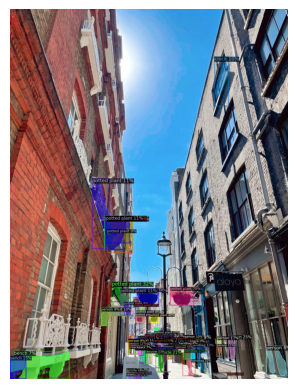

In [5]:
for path in tqdm.tqdm(args.input, disable=True):
    # use PIL, to be consistent with evaluation
    img = read_image(path, format="BGR")
    start_time = time.time()
    predictions, visualized_output = demo.run_on_image(img)
    print(
        "{}: {} in {:.2f}s".format(
            path,
            "detected {} instances".format(len(predictions["instances"]))
            if "instances" in predictions
            else "finished",
            time.time() - start_time,
        )
    )
    plt.axis('off')
    plt.imshow(visualized_output.get_image()[:, :, :])
    plt.show()

    if os.path.isdir(args.output):
        assert os.path.isdir(args.output), args.output
        out_filename = os.path.join(args.output, os.path.basename(path))
    else:
        assert len(args.input) == 1, "Please specify a directory with args.output"
        out_filename = args.output
    visualized_output.save(out_filename)


### Webcam Demo

In [6]:
cam = cv2.VideoCapture(0)
for vis in tqdm.tqdm(demo.run_on_video(cam)):
    cv2.namedWindow(WINDOW_NAME, cv2.WINDOW_NORMAL)
    cv2.imshow(WINDOW_NAME, vis)
    if cv2.waitKey(1) == 27:
        break  # esc to quit
cam.release()
cv2.destroyAllWindows()

7it [00:05,  1.35it/s]


### Video Demo

In [7]:
args.video_input = '../videos/planning.mp4'

video = cv2.VideoCapture(args.video_input)
num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
basename = os.path.basename(args.video_input)

for vis_frame in tqdm.tqdm(demo.run_on_video(video), total=num_frames):
    cv2.namedWindow(basename, cv2.WINDOW_NORMAL)
    cv2.imshow(basename, vis_frame)
    if cv2.waitKey(1) == 27:
        break  # esc to quit

video.release()
cv2.destroyAllWindows()

  0%|          | 3/1110 [00:12<1:19:16,  4.30s/it]
